In [3]:
import pandas as pd          
import numpy as np           
import torch                 
import torch.nn as nn        
from torch.utils.data import Dataset, DataLoader  
from sklearn.model_selection import train_test_split  
import itertools 

Dataset Preprocessing

In [29]:
df_behaviour = pd.read_csv(
    "behaviors.tsv",
    sep="\t",
    header=None,
    names=["impression_id", "user_id", "time", "history", "impressions"],
    dtype=str,          
    quoting=3          
)

In [30]:
df_behaviour

,impression_id,user_id,time,history,impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...
...,...,...,...,...,...
156960,156961,U21593,11/14/2019 10:24:05 PM,N7432 N58559 N1954 N43353 N14343 N13008 N28833...,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...
156961,156962,U10123,11/13/2019 6:57:04 AM,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...
156962,156963,U75630,11/14/2019 10:58:13 AM,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...
156963,156964,U44625,11/13/2019 2:57:02 PM,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N6219-0 N3663-0 N31147-0 N58363-0 N4107-0 N457...


In [31]:
df_news = pd.read_csv(
    "news.tsv",
    sep="\t",
    header=None,
    names=["news_id", "category", "subcategory", "title", "abstract", "url", "title_entities", "abstract_entities"],
    dtype=str,
    quoting=3
)

In [32]:
df_news

,news_id,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."
...,...,...,...,...,...,...,...,...
51277,N16909,weather,weathertopstories,"Adapting, Learning And Soul Searching: Reflect...",Woolsey Fire Anniversary: A community is forev...,https://assets.msn.com/labs/mind/BBWzQJK.html,"[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid...","[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid..."
51278,N47585,lifestyle,lifestylefamily,Family says 13-year-old Broadway star died fro...,NaN,https://assets.msn.com/labs/mind/BBWzQYV.html,"[{""Label"": ""Broadway theatre"", ""Type"": ""F"", ""W...",[]
51279,N7482,sports,more_sports,St. Dominic soccer player tries to kick cancer...,"Sometimes, what happens on the sidelines can b...",https://assets.msn.com/labs/mind/BBWzQnK.html,[],[]
51280,N34418,sports,soccer_epl,How the Sounders won MLS Cup,"Mark, Jeremiah and Casey were so excited they ...",https://assets.msn.com/labs/mind/BBWzQuK.html,"[{""Label"": ""MLS Cup"", ""Type"": ""U"", ""WikidataId...",[]


In [33]:
df_news["title"] = df_news["title"].fillna("")
df_news["abstract"] = df_news["abstract"].fillna("")
df_news["text"] = df_news["title"] + " " + df_news["abstract"]
df_news_text = df_news[["news_id", "text"]]

In [34]:
df_news

,news_id,category,subcategory,title,abstract,url,title_entities,abstract_entities,text
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],"The Brands Queen Elizabeth, Prince Charles, an..."
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...",50 Worst Habits For Belly Fat These seemingly ...
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId...",The Cost of Trump's Aid Freeze in the Trenches...
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ...",I Was An NBA Wife. Here's How It Affected My M...
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","How to Get Rid of Skin Tags, According to a De..."
...,...,...,...,...,...,...,...,...,...
51277,N16909,weather,weathertopstories,"Adapting, Learning And Soul Searching: Reflect...",Woolsey Fire Anniversary: A community is forev...,https://assets.msn.com/labs/mind/BBWzQJK.html,"[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid...","[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid...","Adapting, Learning And Soul Searching: Reflect..."
51278,N47585,lifestyle,lifestylefamily,Family says 13-year-old Broadway star died fro...,,https://assets.msn.com/labs/mind/BBWzQYV.html,"[{""Label"": ""Broadway theatre"", ""Type"": ""F"", ""W...",[],Family says 13-year-old Broadway star died fro...
51279,N7482,sports,more_sports,St. Dominic soccer player tries to kick cancer...,"Sometimes, what happens on the sidelines can b...",https://assets.msn.com/labs/mind/BBWzQnK.html,[],[],St. Dominic soccer player tries to kick cancer...
51280,N34418,sports,soccer_epl,How the Sounders won MLS Cup,"Mark, Jeremiah and Casey were so excited they ...",https://assets.msn.com/labs/mind/BBWzQuK.html,"[{""Label"": ""MLS Cup"", ""Type"": ""U"", ""WikidataId...",[],"How the Sounders won MLS Cup Mark, Jeremiah an..."


Toxiticty Calculation with Hugging Face

In [10]:
pip install transformers==4.41.2

In [11]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [36]:
from transformers import pipeline

df_news = df_news.head(5000)

tox_clf = pipeline(
    task="text-classification",
    model="unitary/toxic-bert",
    truncation=True
)

texts = df_news["text"].tolist()

results = tox_clf(
    texts,
    batch_size=32,     
    truncation=True
)

df_news["toxicity_label"] = [r["label"] for r in results]
df_news["toxicity_score"] = [float(r["score"]) for r in results]

df_news.loc[df_news["toxicity_label"].str.lower().isin(["non-toxic", "not-toxic", "nontoxic"]), "toxicity_score"] = \
    1.0 - df_news.loc[df_news["toxicity_label"].str.lower().isin(["non-toxic", "not-toxic", "nontoxic"]), "toxicity_score"]

df_tox = df_news[["news_id", "toxicity_score"]]
df_tox.to_csv("news_toxicity_scores.csv", index=False)

In [37]:
MODEL_CANDIDATES = [
    "hamzab/roberta-fake-news-classification",      
    "mrm8488/bert-tiny-finetuned-fake-news-detection",  
    "jy46604790/Fake-News-Bert-Detect"             
]

ver_clf = None
last_err = None
for m in MODEL_CANDIDATES:
    try:
        ver_clf = pipeline("text-classification", model=m, truncation=True)
        print("Using veracity model:", m)
        break
    except Exception as e:
        last_err = e

if ver_clf is None:
    raise RuntimeError(f"No veracity model could be loaded. Last error: {last_err}")

texts = df_news["text"].tolist()
results = ver_clf(texts, batch_size=16, truncation=True)


labels = [str(r["label"]).lower() for r in results]
scores = [float(r["score"]) for r in results]

df_news["veracity_label"] = labels
df_news["veracity_raw_score"] = scores

df_news["veracity_score"] = df_news["veracity_raw_score"]

fake_keywords = ["fake", "false", "misinfo", "misinformation", "rumor", "rumour", "hoax", "deceptive"]
is_fake = df_news["veracity_label"].apply(lambda x: any(k in x for k in fake_keywords))
df_news.loc[is_fake, "veracity_score"] = 1.0 - df_news.loc[is_fake, "veracity_raw_score"]

df_ver = df_news[["news_id", "veracity_score"]]
df_ver.to_csv("news_veracity_scores.csv", index=False)

print(df_ver.head())
print("Saved:", "news_veracity_scores.csv")
print(df_ver["veracity_score"].describe())

print("\nLowest veracity (top 5):")
print(df_news.sort_values("veracity_score").head(5)[["news_id", "title", "veracity_score"]])

print("\nHighest veracity (top 5):")
print(df_news.sort_values("veracity_score", ascending=False).head(5)[["news_id", "title", "veracity_score"]])

Using veracity model: hamzab/roberta-fake-news-classification
  news_id  veracity_score
0  N55528        0.000021
1  N19639        0.000021
2  N61837        0.000022
3  N53526        0.000021
4  N38324        0.000212
Saved: news_veracity_scores.csv
count    5000.000000
mean        0.410085
std         0.483697
min         0.000020
25%         0.000021
50%         0.001227
75%         0.999880
max         0.999969
Name: veracity_score, dtype: float64

Lowest veracity (top 5):
     news_id                                              title  \
3758  N16696  UEFA Release Statement Conceding Complacency i...   
504    N2336  Michael Bennett Sounds Off On Suspension, Trad...   
4956  N14554  AT&T Defuses Elliott's Activist Pressure With ...   
1516  N33059  30 All-You-Can-Eat Seafood Restaurants Reviewe...   
4133  N43482  R. Kelly Denied Bail on Sex-Trafficking Charge...   

      veracity_score  
3758         0.00002  
504          0.00002  
4956         0.00002  
1516         0.00002  
4

In [38]:
ver_clf = pipeline("text-classification", model="hamzab/roberta-fake-news-classification", truncation=True)

print("Model:", ver_clf.model.config._name_or_path)
print("id2label:", ver_clf.model.config.id2label)
print("label2id:", ver_clf.model.config.label2id)

samples = [
    "The government announced a new policy today after a long debate.",
    "Shocking secret cure they don't want you to know!!! Click now!"
]

out = ver_clf(samples, truncation=True)
print("Sample outputs:", out)

Model: hamzab/roberta-fake-news-classification
id2label: {0: 'FAKE', 1: 'TRUE'}
label2id: None
Sample outputs: [{'label': 'TRUE', 'score': 0.9999504089355469}, {'label': 'FAKE', 'score': 0.9999336004257202}]


In [39]:
import pandas as pd


df_tox = pd.read_csv("news_toxicity_scores.csv", dtype={"news_id": str})
df_ver = pd.read_csv("news_veracity_scores.csv", dtype={"news_id": str})

df_news = pd.read_csv(
    "news.tsv",
    sep="\t",
    header=None,
    names=[
        "news_id", "category", "subcategory", "title", "abstract",
        "url", "title_entities", "abstract_entities"
    ],
    dtype=str,
    quoting=3
)


df_meta = df_news[["news_id", "category", "subcategory"]].drop_duplicates(subset=["news_id"])

df_scores = df_meta.merge(df_tox, on="news_id", how="inner").merge(df_ver, on="news_id", how="inner")

df_scores.to_csv("news_scores.csv", index=False)

print("Saved: news_scores.csv")
print("Rows:", len(df_scores))
print(df_scores.head())

print("\nMissing check:")
print("tox rows:", len(df_tox), "| ver rows:", len(df_ver), "| merged rows:", len(df_scores))

print("\nToxicity summary:")
print(df_scores["toxicity_score"].describe())

print("\nVeracity summary:")
print(df_scores["veracity_score"].describe())

print("\nTop 5 most toxic:")
print(df_scores.sort_values("toxicity_score", ascending=False).head(5)[["news_id", "toxicity_score", "veracity_score", "category"]])

print("\nTop 5 lowest veracity:")
print(df_scores.sort_values("veracity_score").head(5)[["news_id", "toxicity_score", "veracity_score", "category"]])


Saved: news_scores.csv
Rows: 5000
  news_id   category      subcategory  toxicity_score  veracity_score
0  N55528  lifestyle  lifestyleroyals        0.000812        0.000021
1  N19639     health       weightloss        0.302172        0.000021
2  N61837       news        newsworld        0.001011        0.000022
3  N53526     health           voices        0.032858        0.000021
4  N38324     health          medical        0.001006        0.000212

Missing check:
tox rows: 5000 | ver rows: 5000 | merged rows: 5000

Toxicity summary:
count    5000.000000
mean        0.008118
std         0.041623
min         0.000500
25%         0.000670
50%         0.000826
75%         0.001520
max         0.873595
Name: toxicity_score, dtype: float64

Veracity summary:
count    5000.000000
mean        0.410085
std         0.483697
min         0.000020
25%         0.000021
50%         0.001227
75%         0.999880
max         0.999969
Name: veracity_score, dtype: float64

Top 5 most toxic:
     news_i

In [52]:
from sklearn.model_selection import train_test_split



K = 5   
TEST_SIZE = 0.2 


df_behaviour["time"] = df_behaviour["time"].fillna("")
df_behaviour["impressions"] = df_behaviour["impressions"].fillna("").astype(str)

print("Total impressions:", len(df_behaviour))


Total impressions: 156965


In [53]:
df_behaviour = df_behaviour.sort_values("time")

df_train, df_test = train_test_split(df_behaviour, test_size=TEST_SIZE, shuffle=False)

print("Train impressions:", len(df_train))
print("Test impressions :", len(df_test))


Train impressions: 125572
Test impressions : 31393


In [54]:
clicked_news = []

for s in df_train["impressions"].tolist():
    for token in s.split():
        if "-" not in token:
            continue
        nid, lab = token.rsplit("-", 1)
        if lab == "1":
            clicked_news.append(nid)

pop_counts = pd.Series(clicked_news).value_counts()
print("Unique clicked news in train:", pop_counts.shape[0])



Unique clicked news in train: 6470


In [55]:

df_scores = pd.read_csv( "news_scores.csv", dtype={"news_id": str})

tox_map = dict(zip(df_scores["news_id"], df_scores["toxicity_score"]))
ver_map = dict(zip(df_scores["news_id"], df_scores["veracity_score"]))

print("Scored news count:", len(df_scores))



Scored news count: 5000


In [56]:
hits = []
ndcgs = []
tox_exposures = []
ver_exposures = []

evaluated = 0
skipped_no_click = 0
skipped_empty = 0

for s in df_test["impressions"].tolist():
    s = s.strip()
    if not s:
        skipped_empty += 1
        continue

    candidates = []
    clicked = set()

    for token in s.split():
        if "-" not in token:
            continue
        nid, lab = token.rsplit("-", 1)
        candidates.append(nid)
        if lab == "1":
            clicked.add(nid)

    if len(candidates) == 0:
        skipped_empty += 1
        continue

    if len(clicked) == 0:
        skipped_no_click += 1
        continue

    candidates_sorted = sorted(candidates, key=lambda x: pop_counts.get(x, 0), reverse=True)
    recs = candidates_sorted[:K]

    # HR@K
    hit = 1 if any(r in clicked for r in recs) else 0
    hits.append(hit)

    dcg = 0.0
    for rank, nid in enumerate(recs, start=1):
        if nid in clicked:
            dcg = 1.0 / np.log2(rank + 1)
            break
    ndcgs.append(dcg)

    tox_vals = [tox_map.get(n, np.nan) for n in recs]
    ver_vals = [ver_map.get(n, np.nan) for n in recs]

    tox_exposures.append(np.nanmean(tox_vals))
    ver_exposures.append(np.nanmean(ver_vals))

    evaluated += 1

HRK = float(np.mean(hits)) if hits else 0.0
NDCGK = float(np.mean(ndcgs)) if ndcgs else 0.0
TOX = float(np.nanmean(tox_exposures)) if tox_exposures else np.nan
VER = float(np.nanmean(ver_exposures)) if ver_exposures else np.nan

print("\n===== FAZ 3 RESULTS (Popularity baseline) =====")
print(f"Evaluated impressions: {evaluated}")
print(f"Skipped (empty):      {skipped_empty}")
print(f"Skipped (no click):   {skipped_no_click}")
print(f"HR@{K}:   {HRK:.4f}")
print(f"NDCG@{K}: {NDCGK:.4f}")
print(f"Avg toxicity exposure: {TOX:.4f}")
print(f"Avg veracity exposure: {VER:.4f}")




C:\Users\Asus\AppData\Local\Temp/ipykernel_20368/1943519093.py:58: RuntimeWarning: Mean of empty slice
  tox_exposures.append(np.nanmean(tox_vals))
C:\Users\Asus\AppData\Local\Temp/ipykernel_20368/1943519093.py:59: RuntimeWarning: Mean of empty slice
  ver_exposures.append(np.nanmean(ver_vals))



===== FAZ 3 RESULTS (Popularity baseline) =====
Evaluated impressions: 31393
Skipped (empty):      0
Skipped (no click):   0
HR@5:   0.4326
NDCG@5: 0.2865
Avg toxicity exposure: 0.0110
Avg veracity exposure: 0.2693


In [57]:
df_result = pd.DataFrame([{
    "model": "Popularity",
    f"HR@{K}": HRK,
    f"NDCG@{K}": NDCGK,
    "toxicity_exposure": TOX,
    "veracity_exposure": VER,
    "n_eval": evaluated,
    "skipped_empty": skipped_empty,
    "skipped_no_click": skipped_no_click
}])

df_result.to_csv("phase3_results_popularity.csv", index=False)
print("\nSaved: phase3_results_popularity.csv")
print(df_result)


Saved: phase3_results_popularity.csv
        model      HR@5    NDCG@5  toxicity_exposure  veracity_exposure  \
0  Popularity  0.432644  0.286523           0.011012           0.269344   

   n_eval  skipped_empty  skipped_no_click  
0   31393              0                 0  


In [58]:

print("df_behaviour:", df_behaviour.shape)
print("df_scores:", df_scores.shape)

print(df_behaviour.head(2))
print(df_scores.head(2))


df_behaviour: (156965, 5)
df_scores: (5000, 5)
      impression_id user_id                    time  \
64759         64760  U22697  11/10/2019 10:00:00 AM   
55847         55848  U50864  11/10/2019 10:00:02 AM   

                                                 history  \
64759  N32060 N10059 N43265 N29021 N44188 N6959 N1020...   
55847  N4978 N57537 N15122 N9226 N37003 N16715 N36530...   

                                             impressions  
64759       N57005-0 N16915-0 N15435-0 N39471-0 N49279-1  
55847  N44540-0 N23784-0 N35567-0 N21456-0 N20834-0 N...  
  news_id   category      subcategory  toxicity_score  veracity_score
0  N55528  lifestyle  lifestyleroyals        0.000812        0.000021
1  N19639     health       weightloss        0.302172        0.000021


In [59]:

rows = []
max_candidates_per_impression = 30  

for _, r in df_behaviour.iterrows():
    user = r["user_id"]
    impr = r["impressions"]

    if pd.isna(impr) or str(impr).strip() == "":
        continue

    parts = str(impr).split()
    parts = parts[:max_candidates_per_impression]

    
    clicked_news = None
    candidates = []

    for p in parts:
        nid, lbl = p.split("-")
        lbl = int(lbl)
        candidates.append((nid, lbl))
        if lbl == 1 and clicked_news is None:
            clicked_news = nid

    if clicked_news is None:
        continue

    rows.append({
        "user_id": user,
        "clicked_news": clicked_news,
        "candidate_news": [nid for nid, _ in candidates]
    })

df_bandit = pd.DataFrame(rows)
print("df_bandit:", df_bandit.shape)
df_bandit.head()


df_bandit: (135022, 3)


,user_id,clicked_news,candidate_news
0,U22697,N49279,"[N57005, N16915, N15435, N39471, N49279]"
1,U69430,N49279,"[N14522, N36703, N25546, N26706, N61145, N2188..."
2,U61562,N49279,"[N61022, N49279]"
3,U31618,N49279,"[N49279, N61022]"
4,U4378,N34520,"[N61022, N57614, N16915, N61145, N48657, N2934..."


In [60]:
score_map_tox = dict(zip(df_scores["news_id"], df_scores["toxicity_score"]))
score_map_ver = dict(zip(df_scores["news_id"], df_scores["veracity_score"]))

def get_tox(nid):
    return float(score_map_tox.get(nid, np.nan))

def get_ver(nid):
    return float(score_map_ver.get(nid, np.nan))

df_bandit["clicked_tox"] = df_bandit["clicked_news"].apply(get_tox)
df_bandit["clicked_ver"] = df_bandit["clicked_news"].apply(get_ver)

before = len(df_bandit)
df_bandit = df_bandit.dropna(subset=["clicked_tox", "clicked_ver"]).reset_index(drop=True)
print("Dropped (missing scores):", before - len(df_bandit))
print("Remaining:", len(df_bandit))


Dropped (missing scores): 132184
Remaining: 2838


In [61]:
a = 0.3   
b = 0.7   

df_bandit["reward"] = 1.0 + a * df_bandit["clicked_ver"] - b * df_bandit["clicked_tox"]
df_bandit["reward"].describe()


count    2838.000000
mean        1.032782
std         0.107089
min         0.892311
25%         0.998192
50%         0.999485
75%         1.000392
max         1.299566
Name: reward, dtype: float64

In [66]:
K = 3

def policy_rank(cand_list, w_ver, w_tox):
    scored = []
    for nid in cand_list:
        v = score_map_ver.get(nid, np.nan)
        t = score_map_tox.get(nid, np.nan)
        if v is None or t is None or np.isnan(v) or np.isnan(t):
            continue
        s = (w_ver * float(v)) - (w_tox * float(t))
        scored.append((nid, s, float(v), float(t)))
    scored.sort(key=lambda x: x[1], reverse=True)
    return scored[:K]  # list of tuples

def eval_policy(df, w_ver, w_tox):
    hits = 0
    tox_sum = 0.0
    ver_sum = 0.0
    n = 0

    for _, r in df.iterrows():
        clicked = r["clicked_news"]
        ranked = policy_rank(r["candidate_news"], w_ver, w_tox)
        if len(ranked) == 0:
            continue

        top_ids = [x[0] for x in ranked]
        hits += 1 if clicked in top_ids else 0

       
        tox_sum += np.mean([x[3] for x in ranked])
        ver_sum += np.mean([x[2] for x in ranked])
        n += 1

    if n == 0:
        return None

    return {
        "w_ver": w_ver,
        "w_tox": w_tox,
        f"HR@{K}": hits / n,
        "toxicity_exposure": tox_sum / n,
        "veracity_exposure": ver_sum / n,
        "n_eval": n
    }

df_eval = df_bandit.sample(min(20000, len(df_bandit)), random_state=42).reset_index(drop=True)

w_vers = [0.0, 0.25, 0.5, 1.0, 2.0]
w_toxs = [0.0, 0.25, 0.5, 1.0, 2.0]

results = []
for wv in w_vers:
    for wt in w_toxs:
        out = eval_policy(df_eval, wv, wt)
        if out is not None:
            results.append(out)

df_phase4 = pd.DataFrame(results).sort_values(by=[f"HR@{K}", "veracity_exposure"], ascending=False)
df_phase4.head(10)


,w_ver,w_tox,HR@3,toxicity_exposure,veracity_exposure,n_eval
0,0.00,0.00,0.978506,0.009461,0.165237,2838
8,0.25,1.00,0.965821,0.008737,0.175399,2838
14,0.50,2.00,0.965821,0.008737,0.175399,2838
9,0.25,2.00,0.965821,0.008737,0.175399,2838
7,0.25,0.50,0.965469,0.008737,0.175400,2838
13,0.50,1.00,0.965469,0.008737,0.175400,2838
19,1.00,2.00,0.965469,0.008737,0.175400,2838
21,2.00,0.25,0.965116,0.008739,0.175400,2838
16,1.00,0.25,0.965116,0.008739,0.175400,2838
22,2.00,0.50,0.965116,0.008739,0.175400,2838


In [67]:

df_phase4["selection_score"] = (
    df_phase4[f"HR@{K}"] - 0.2 * df_phase4["toxicity_exposure"] + 0.1 * df_phase4["veracity_exposure"]
)

best = df_phase4.sort_values("selection_score", ascending=False).iloc[0]
print("BEST POLICY:", best.to_dict())

df_phase4.to_csv("phase4_policy_grid_results.csv", index=False)
print("Saved: phase4_policy_grid_results.csv")


BEST POLICY: {'w_ver': 0.0, 'w_tox': 0.0, 'HR@3': 0.9785059901338972, 'toxicity_exposure': 0.0094607866912179, 'veracity_exposure': 0.1652369175175418, 'n_eval': 2838.0, 'selection_score': 0.9931375245474078}
Saved: phase4_policy_grid_results.csv


In [68]:
K = 3 
print(df_phase4.head(5)[["w_ver","w_tox", f"HR@{K}","toxicity_exposure","veracity_exposure","selection_score"]])
print(df_phase4.tail(5)[["w_ver","w_tox", f"HR@{K}","toxicity_exposure","veracity_exposure","selection_score"]])


    w_ver  w_tox      HR@3  toxicity_exposure  veracity_exposure  \
0    0.00    0.0  0.978506           0.009461           0.165237   
8    0.25    1.0  0.965821           0.008737           0.175399   
14   0.50    2.0  0.965821           0.008737           0.175399   
9    0.25    2.0  0.965821           0.008737           0.175399   
7    0.25    0.5  0.965469           0.008737           0.175400   

    selection_score  
0          0.993138  
8          0.981614  
14         0.981614  
9          0.981614  
7          0.981261  
    w_ver  w_tox      HR@3  toxicity_exposure  veracity_exposure  \
4    0.00    2.0  0.964764           0.008736           0.174693   
5    0.25    0.0  0.961240           0.009299           0.175401   
10   0.50    0.0  0.961240           0.009299           0.175401   
15   1.00    0.0  0.961240           0.009299           0.175401   
20   2.00    0.0  0.961240           0.009299           0.175401   

    selection_score  
4          0.980486  
5     

In [69]:
K = 3
hr_col = f"HR@{K}"
tox_col = "toxicity_exposure"

df = df_phase4.copy().reset_index(drop=True)

def pareto_front_hr_tox(df):
    keep = []
    for i, a in df.iterrows():
        dominated = False
        for j, b in df.iterrows():
            if j == i:
                continue
            
            if (b[hr_col] >= a[hr_col]) and (b[tox_col] <= a[tox_col]) and (
                (b[hr_col] > a[hr_col]) or (b[tox_col] < a[tox_col])
            ):
                dominated = True
                break
        if not dominated:
            keep.append(i)
    return df.loc[keep].copy()

df_pareto_tox = pareto_front_hr_tox(df)

df_pareto_tox = df_pareto_tox.sort_values([hr_col, tox_col], ascending=[False, True]).reset_index(drop=True)

print("Pareto set size (HR vs Toxicity):", len(df_pareto_tox))
df_pareto_tox[[ "w_ver","w_tox", hr_col, tox_col, "veracity_exposure"]].head(20)


Pareto set size (HR vs Toxicity): 6


,w_ver,w_tox,HR@3,toxicity_exposure,veracity_exposure
0,0.00,0.00,0.978506,0.009461,0.165237
1,0.25,2.00,0.965821,0.008737,0.175399
2,0.00,0.25,0.964764,0.008736,0.174693
3,0.00,0.50,0.964764,0.008736,0.174693
4,0.00,1.00,0.964764,0.008736,0.174693
5,0.00,2.00,0.964764,0.008736,0.174693


In [70]:
ver_col = "veracity_exposure"

def pareto_front_hr_ver(df):
    
    keep = []
    for i, a in df.iterrows():
        dominated = False
        for j, b in df.iterrows():
            if j == i:
                continue
           
            if (b[hr_col] >= a[hr_col]) and (b[ver_col] >= a[ver_col]) and (
                (b[hr_col] > a[hr_col]) or (b[ver_col] > a[ver_col])
            ):
                dominated = True
                break
        if not dominated:
            keep.append(i)
    return df.loc[keep].copy()

df_pareto_ver = pareto_front_hr_ver(df)
df_pareto_ver = df_pareto_ver.sort_values([hr_col, ver_col], ascending=[False, False]).reset_index(drop=True)

print("Pareto set size (HR vs Veracity):", len(df_pareto_ver))
df_pareto_ver[[ "w_ver","w_tox", hr_col, "toxicity_exposure", ver_col]].head(20)


Pareto set size (HR vs Veracity): 11


,w_ver,w_tox,HR@3,toxicity_exposure,veracity_exposure
0,0.00,0.00,0.978506,0.009461,0.165237
1,0.25,1.00,0.965821,0.008737,0.175399
2,0.50,2.00,0.965821,0.008737,0.175399
3,0.25,0.50,0.965469,0.008737,0.175400
4,0.50,1.00,0.965469,0.008737,0.175400
5,1.00,2.00,0.965469,0.008737,0.175400
6,2.00,0.25,0.965116,0.008739,0.175400
7,0.25,0.00,0.961240,0.009299,0.175401
8,0.50,0.00,0.961240,0.009299,0.175401
9,1.00,0.00,0.961240,0.009299,0.175401


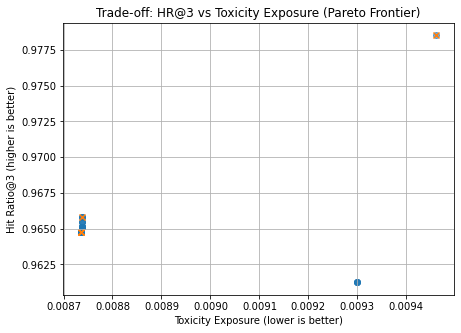

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(df[tox_col], df[hr_col], alpha=0.6)
plt.scatter(df_pareto_tox[tox_col], df_pareto_tox[hr_col], marker='x')  

plt.xlabel("Toxicity Exposure (lower is better)")
plt.ylabel(f"Hit Ratio@{K} (higher is better)")
plt.title(f"Trade-off: HR@{K} vs Toxicity Exposure (Pareto Frontier)")
plt.grid(True)
plt.show()


In [72]:
pip install nbconvert[webpdf]


  Created wheel for websockets: filename=websockets-8.1-cp39-cp39-win_amd64.whl size=68310 sha256=f5b56dd4b45812e1288859544cd5897a010f8634e1f315f9980d95fc8dc562e1
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\d8\b9\a0\b97b211aeda2ebd6ac2e43fc300d308dbf1f9df520ed390cae
Successfully built websockets
